# Action2_price_predict_EDA

二手车价格预测     数据集：     used_car_train_20200313.csv     used_car_testA_20200313.csv     数据来自某交易平台的二手车交易记录     

ToDo：给你一辆车的各个属性（除了price字段），预测它的价格

1、数据探索EDA（20points）     2、使用缺失值可视化工具或pandas_profiling工具（10points）

In [1]:
import pandas as pd
import numpy as np

# 数据加载
train_data = pd.read_csv('./used_car_train_20200313.csv', sep=' ')
test_data = pd.read_csv('./used_car_testB_20200421.csv', sep=' ')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [11]:
# 查看数据缺失值
print(f'isnull().any():\n{train_data.isnull().any()}\n***********************')
print(f'isnull().sum():\n{train_data.isnull().sum()}')

isnull().any():
SaleID               False
name                 False
regDate              False
model                 True
brand                False
bodyType              True
fuelType              True
gearbox               True
power                False
kilometer            False
notRepairedDamage    False
regionCode           False
seller               False
offerType            False
creatDate            False
price                False
v_0                  False
v_1                  False
v_2                  False
v_3                  False
v_4                  False
v_5                  False
v_6                  False
v_7                  False
v_8                  False
v_9                  False
v_10                 False
v_11                 False
v_12                 False
v_13                 False
v_14                 False
dtype: bool
***********************
isnull().sum():
SaleID                  0
name                    0
regDate                 0
model            

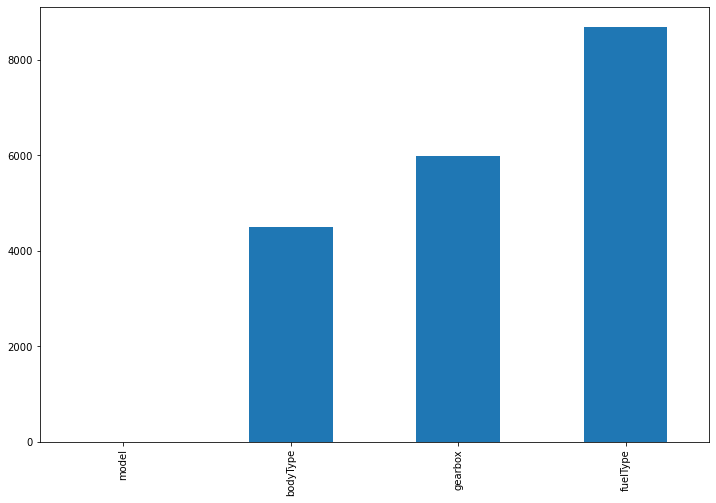

In [12]:
# null可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
missing = train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

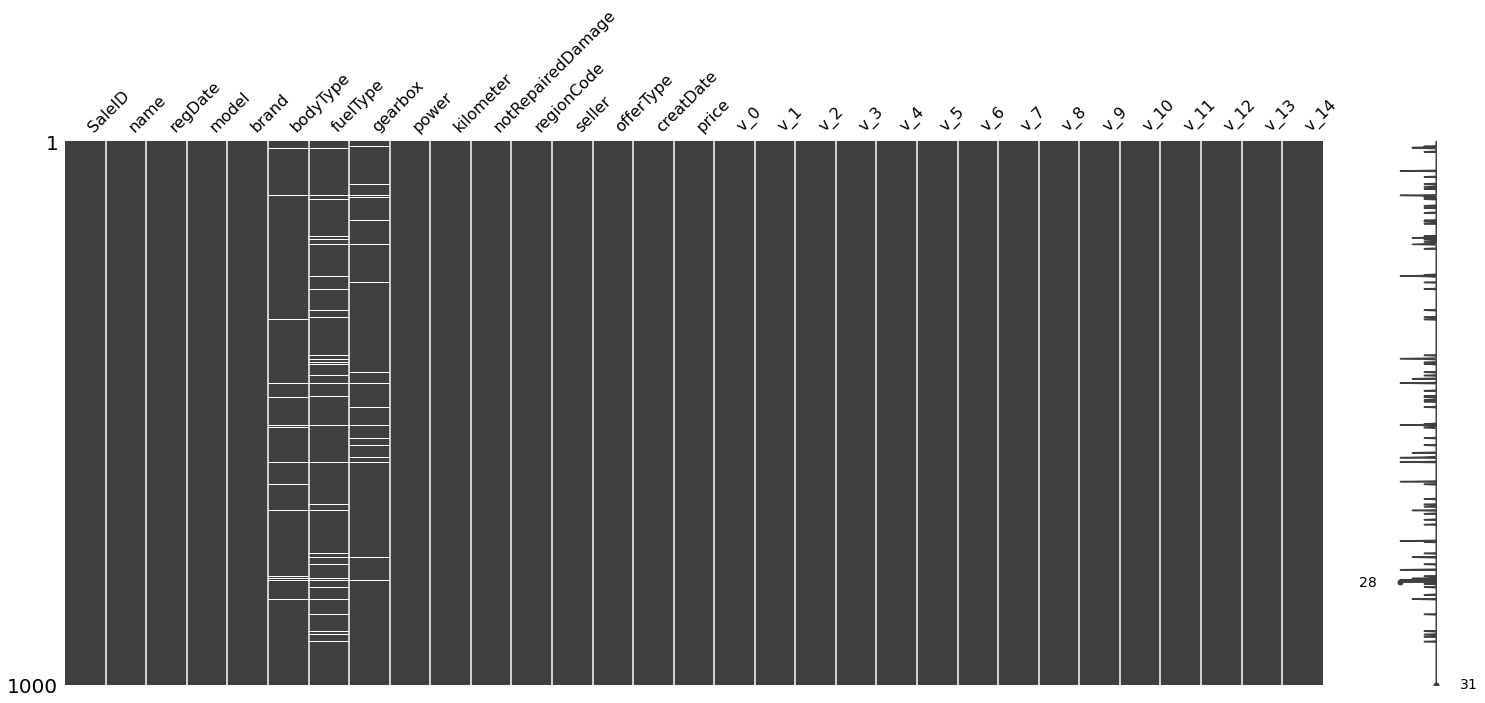

In [14]:
# sample随机抽取1000份，统计缺失值
import missingno as msno
sample = train_data.sample(1000)
msno.matrix(sample)
plt.show()

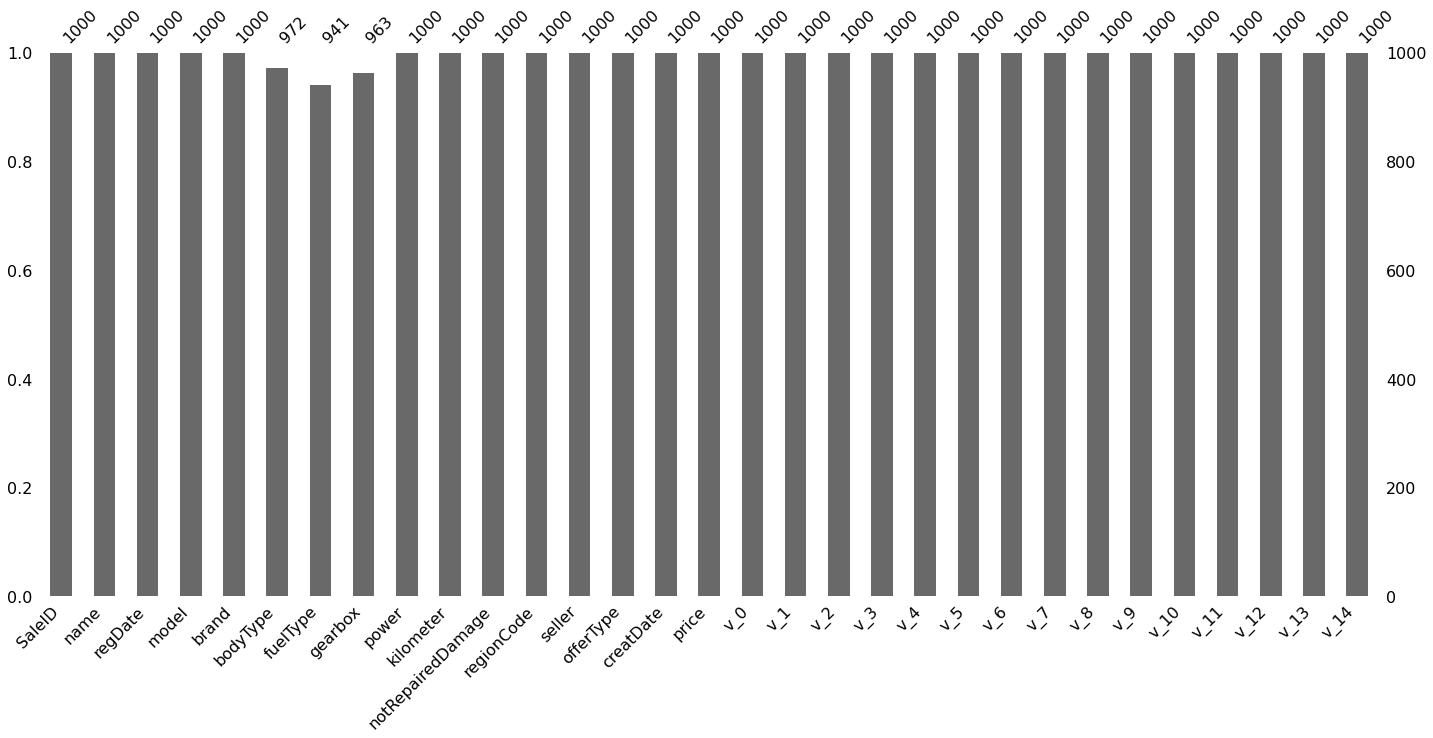

In [15]:
msno.bar(sample)
plt.show()

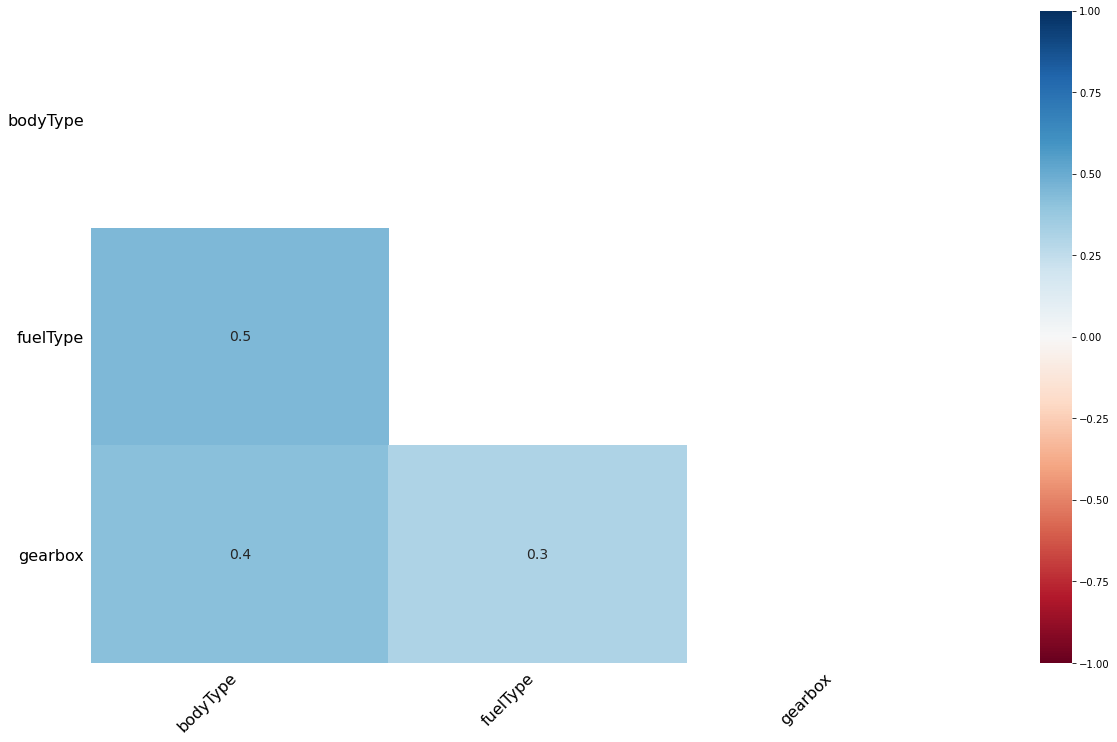

In [16]:
msno.heatmap(sample)
plt.show()

In [17]:
## 输出数据的大小信息
print('训练集大小:',train_data.shape)
print('测试集大小:',test_data.shape)
# 显示notRepairedDamage的分布情况
print(train_data['notRepairedDamage'].value_counts())

训练集大小: (150000, 31)
测试集大小: (50000, 30)
0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64


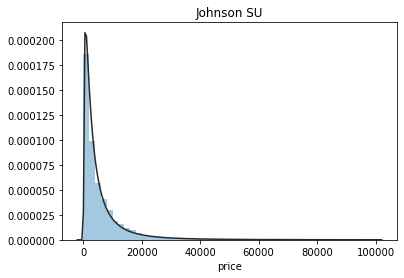

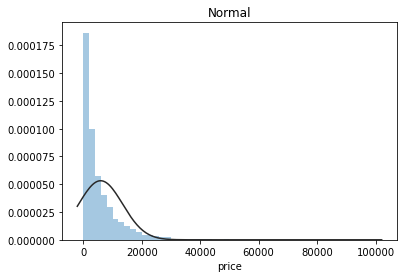

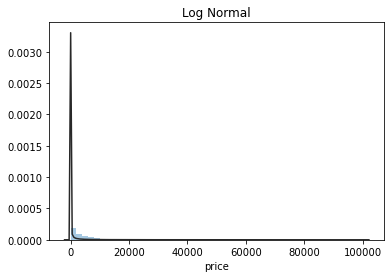

In [18]:
# 研究price的分布
import seaborn as sns
import scipy.stats as st
y = train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu) # kde绘制高斯和密度估计
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
plt.show()

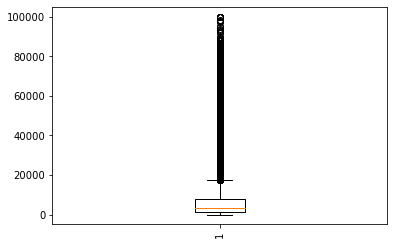

In [36]:
# fig, ax = plt.subplots(1, 1)
plt.boxplot(y)
plt.xticks(rotation=90)
# plt.yticks(rotation=90)
plt.show()

## 通过箱图可以看出异常值很多，所以可以考虑采取以下办法：
* 1、从数据层面，进行差分处理、增长率计算或者boxcox（例如对数变换）变换；
* 2、分别进行建模，即常规范围数据和超大数值数据分开进行建模；
* 3、二者统一

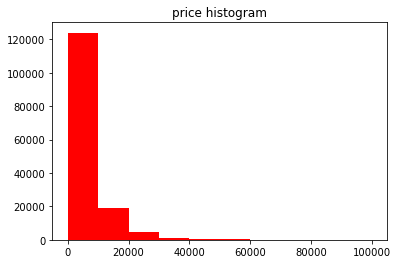

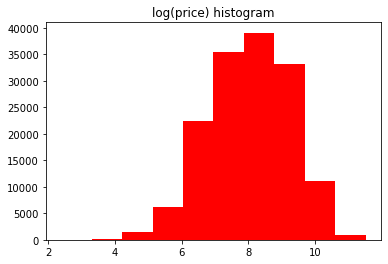

In [19]:
# price 直方图
plt.figure(1); plt.title('price histogram')
plt.hist(train_data['price'], color ='red')
plt.figure(2); plt.title('log(price) histogram')
plt.hist(np.log(train_data['price']), color ='red')
plt.show()

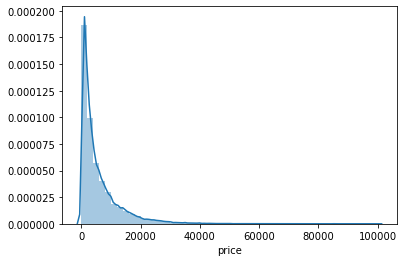

Skewness偏度: 3.346487
Kurtosis峰度: 18.995183


In [21]:
# 计算偏度和峰度（与正态分布进行比较）
sns.distplot(train_data['price'])
plt.show()
print("Skewness偏度: %f" % train_data['price'].skew())
print("Kurtosis峰度: %f" % train_data['price'].kurt())

In [ ]:
# 一行代码生成报告
# import pandas_profiling as pp
# report = pp.ProfileReport(train_data)
# # 导出为html
# report.to_file('report.html')

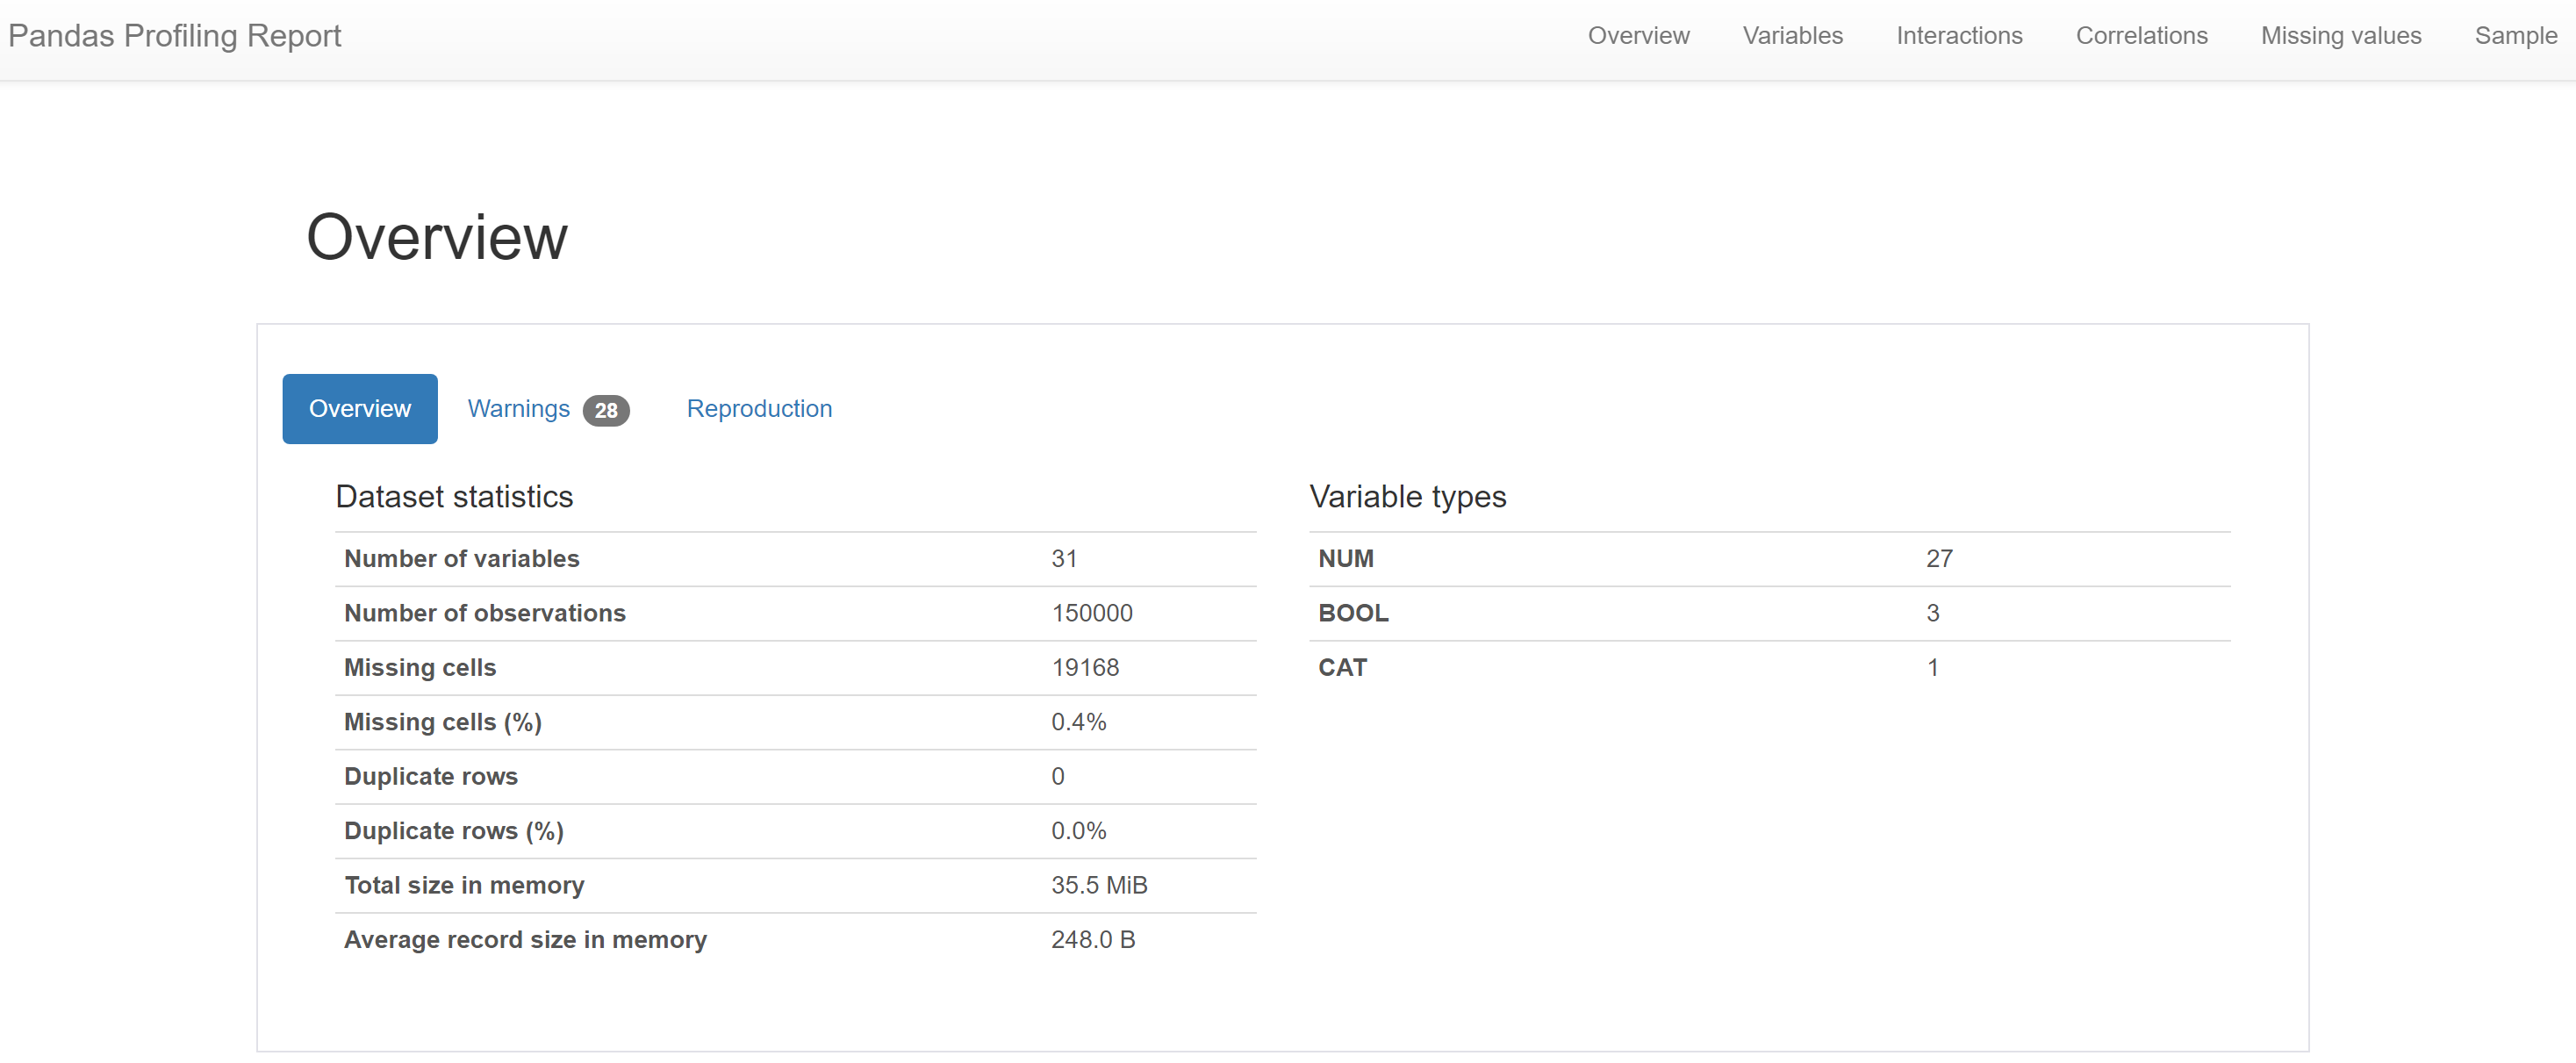

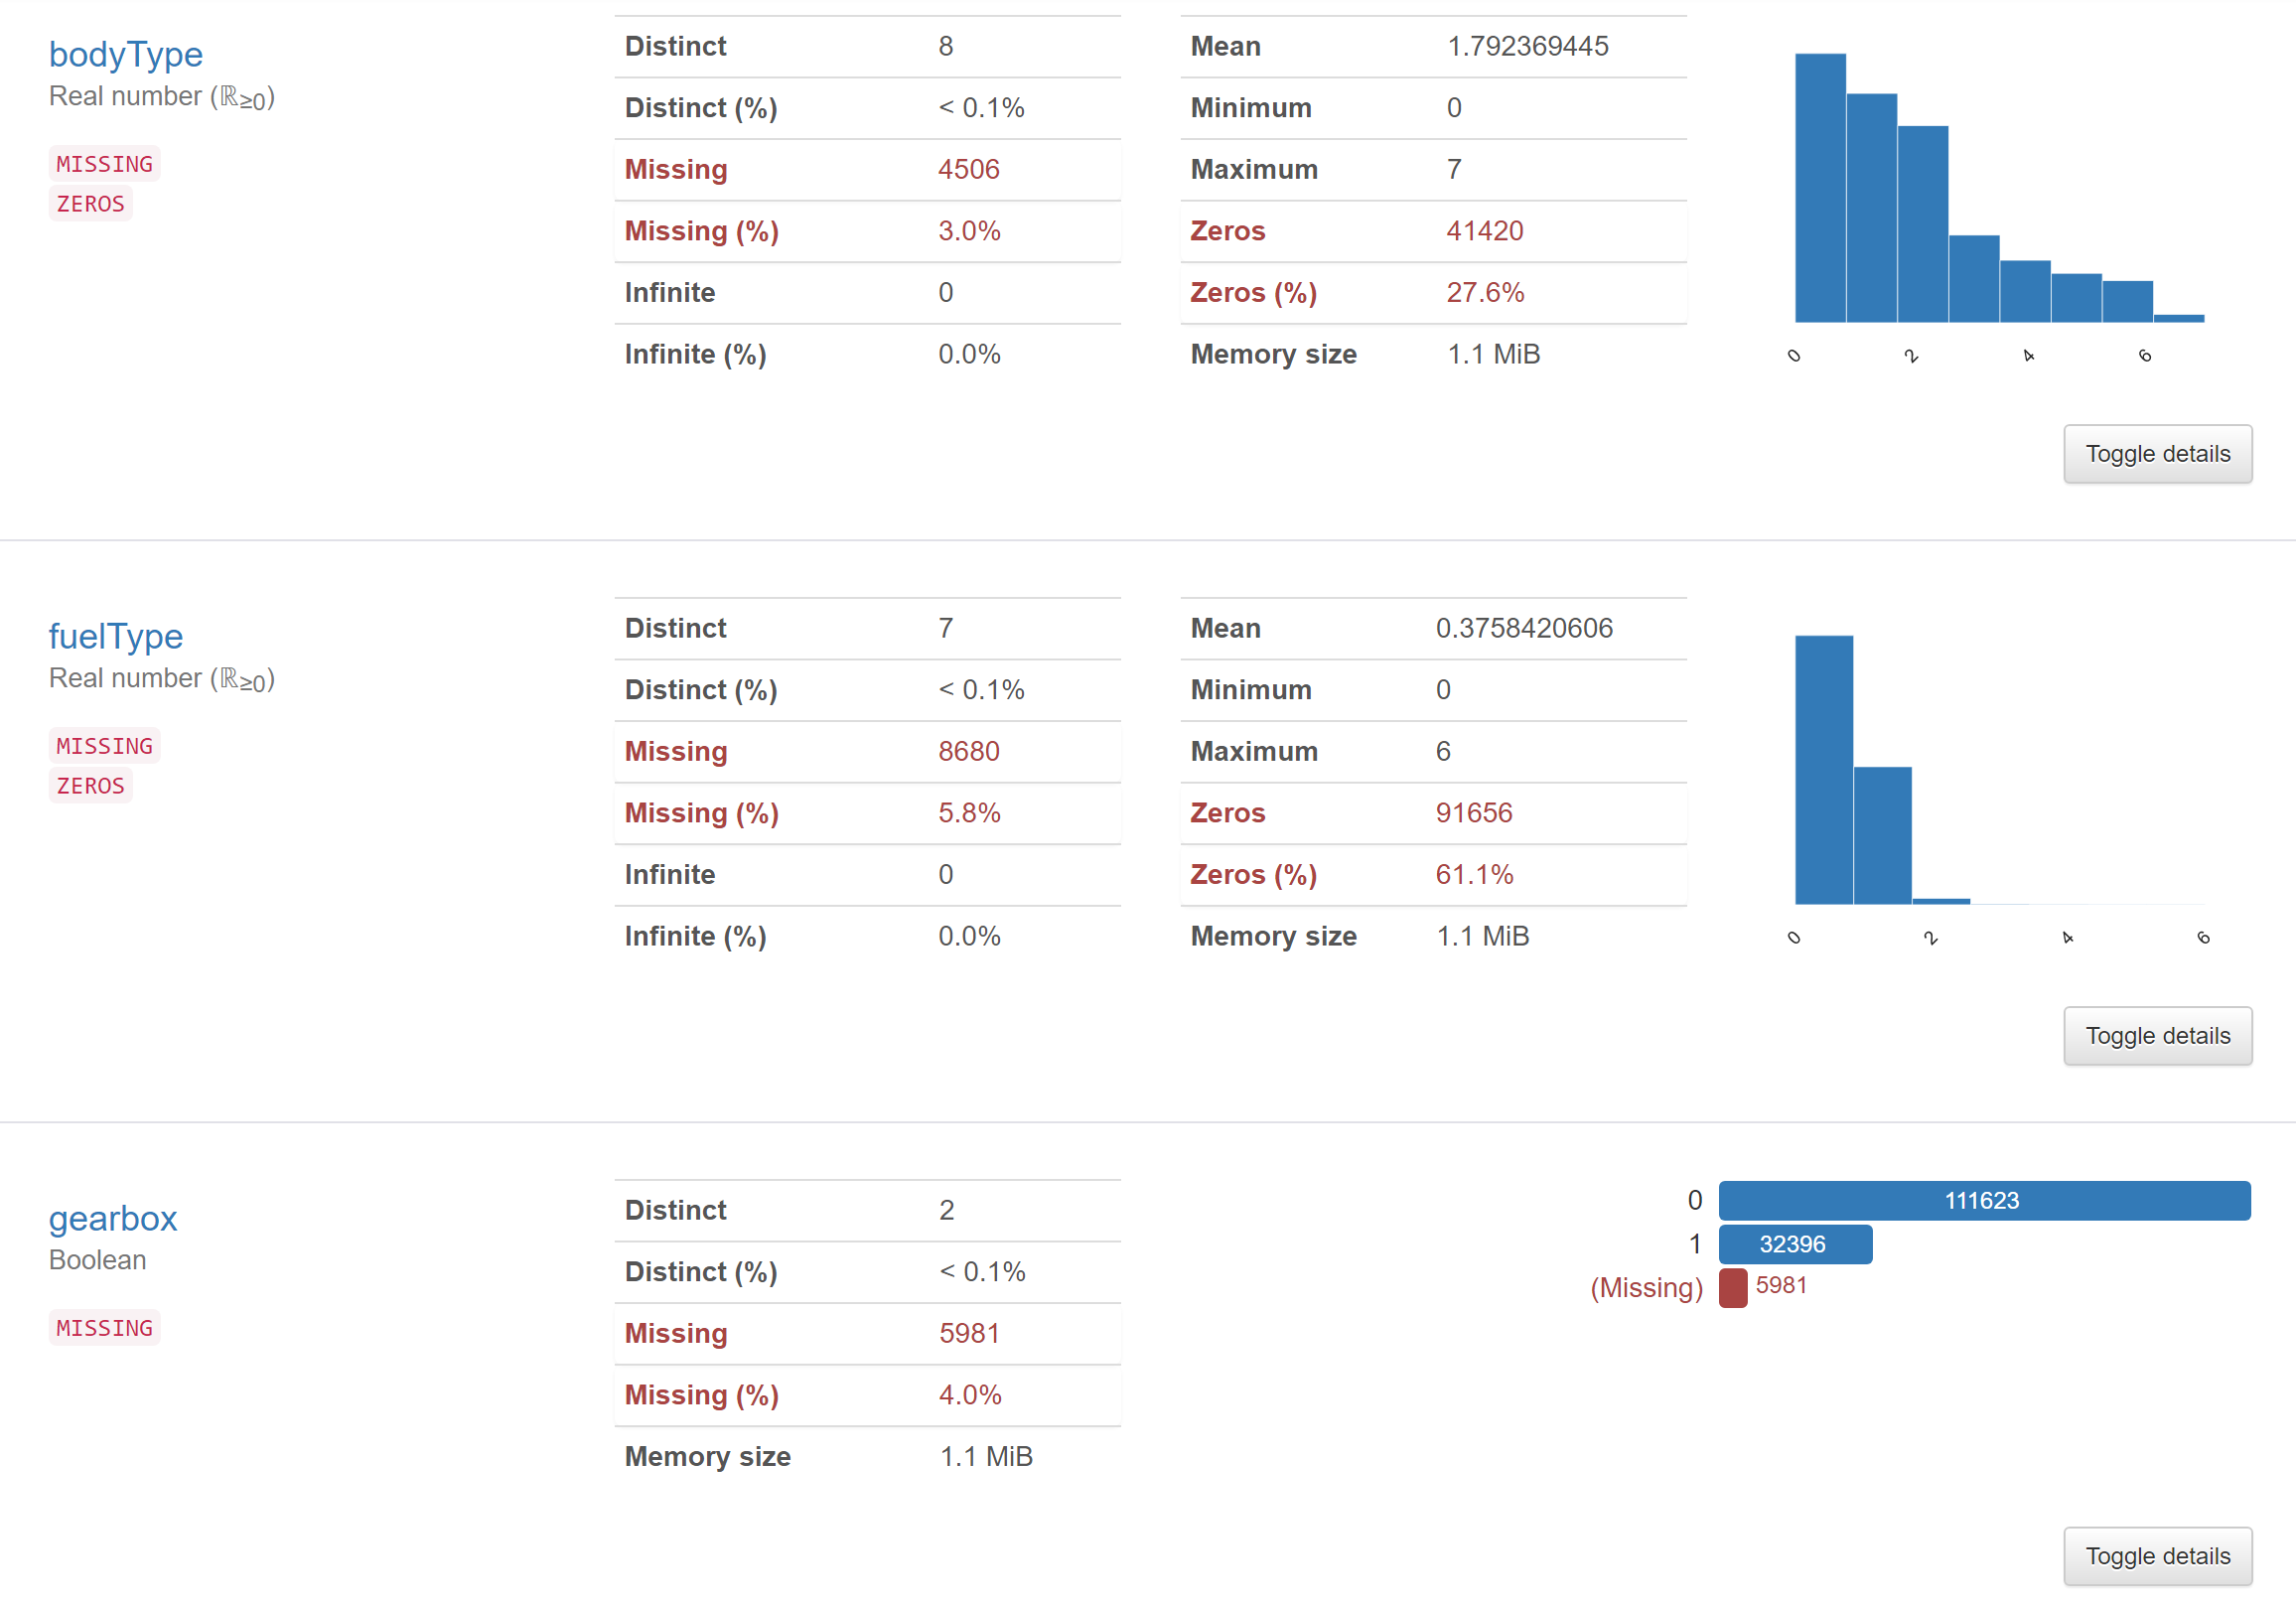

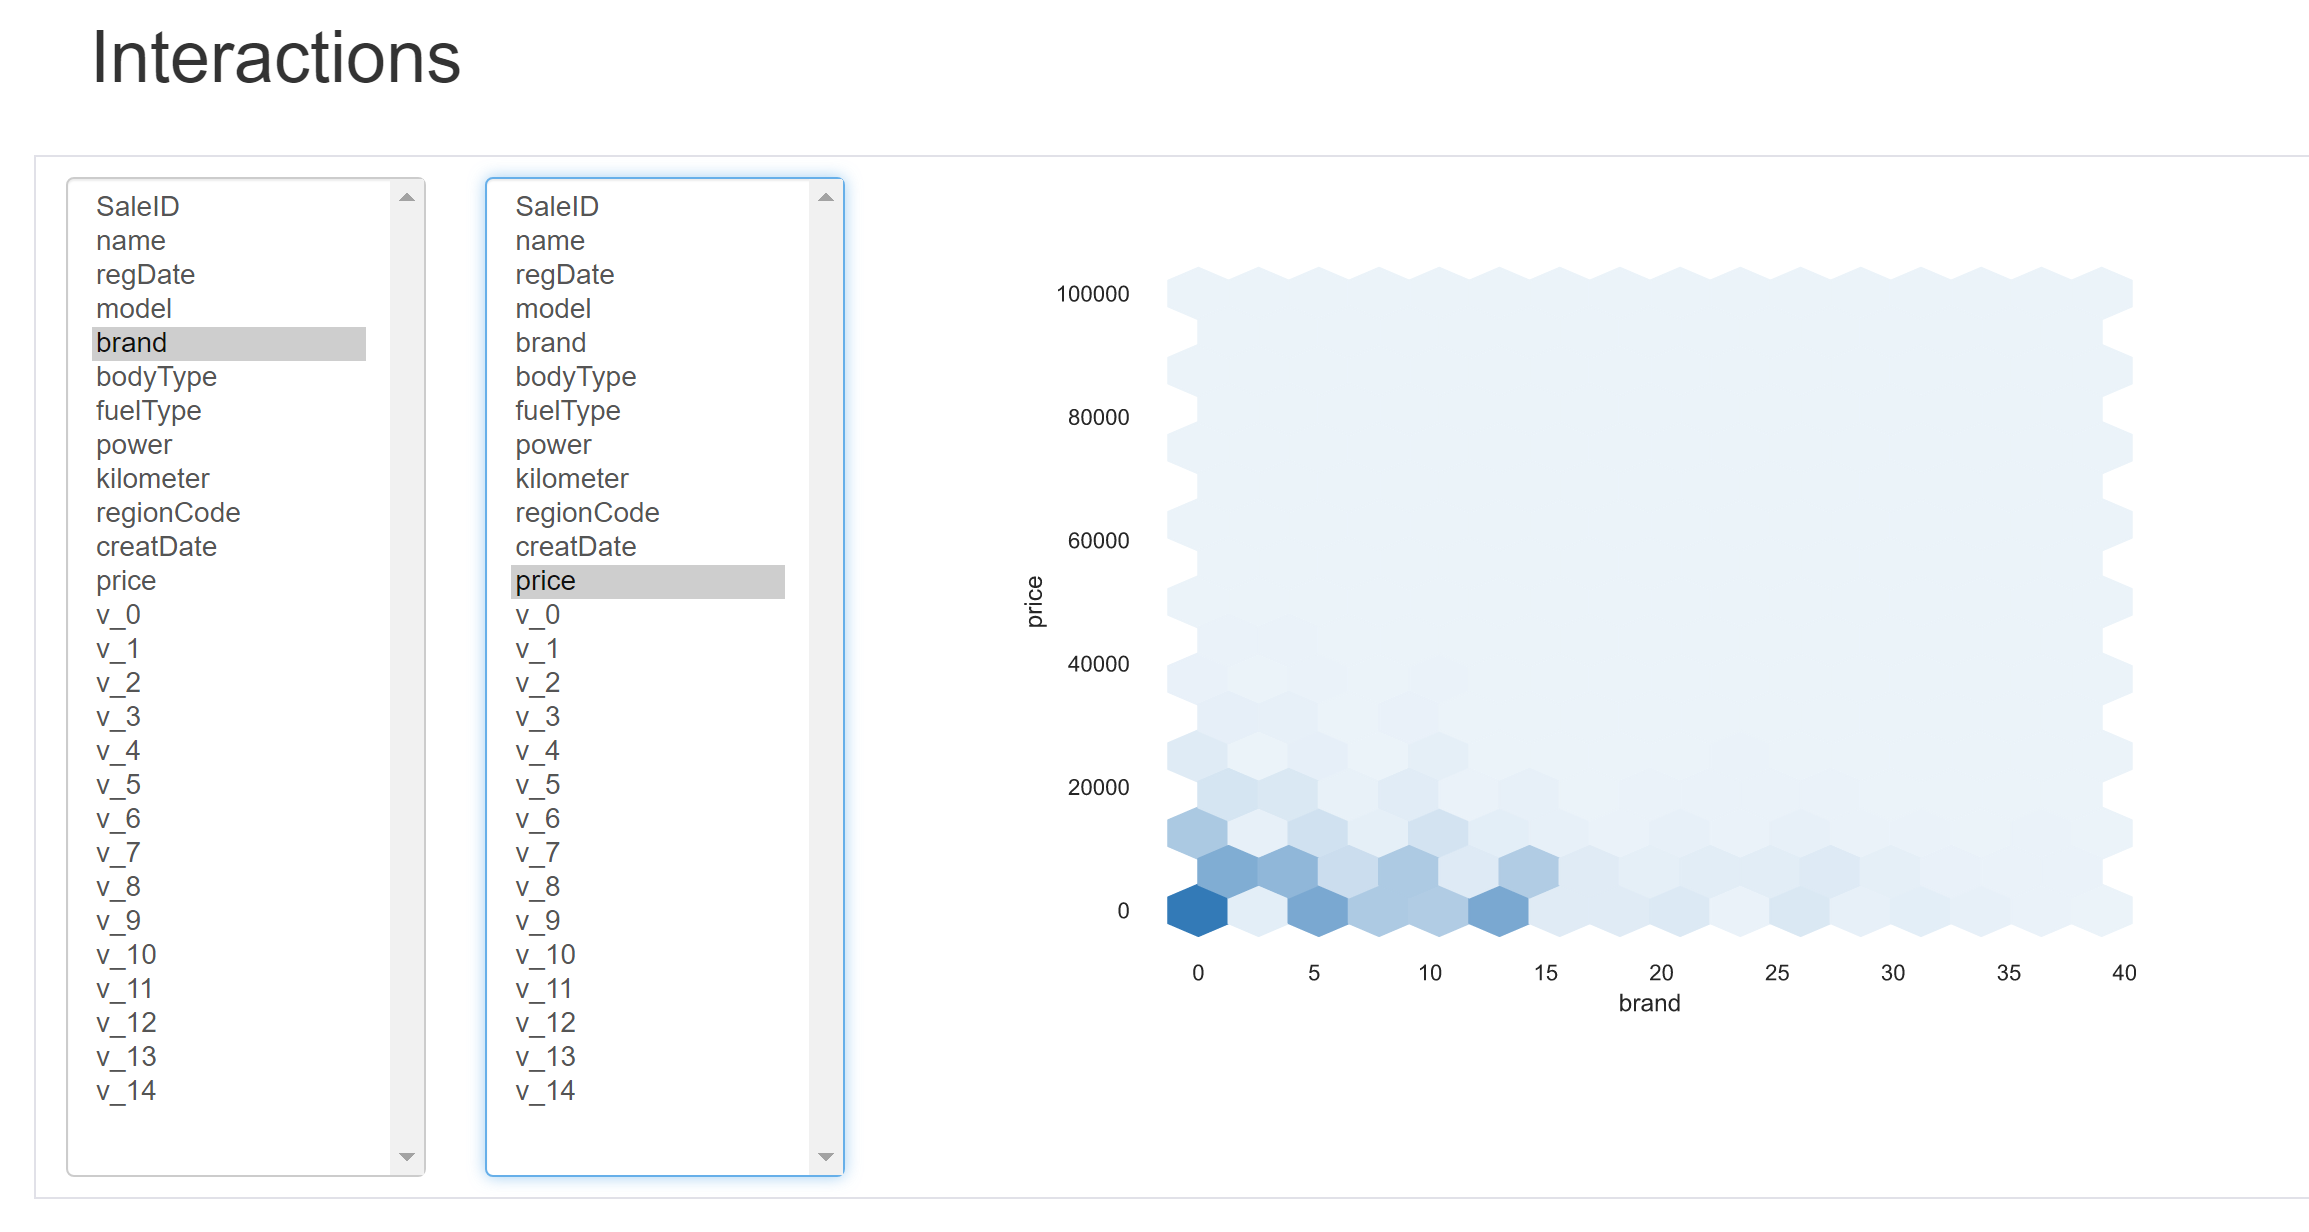

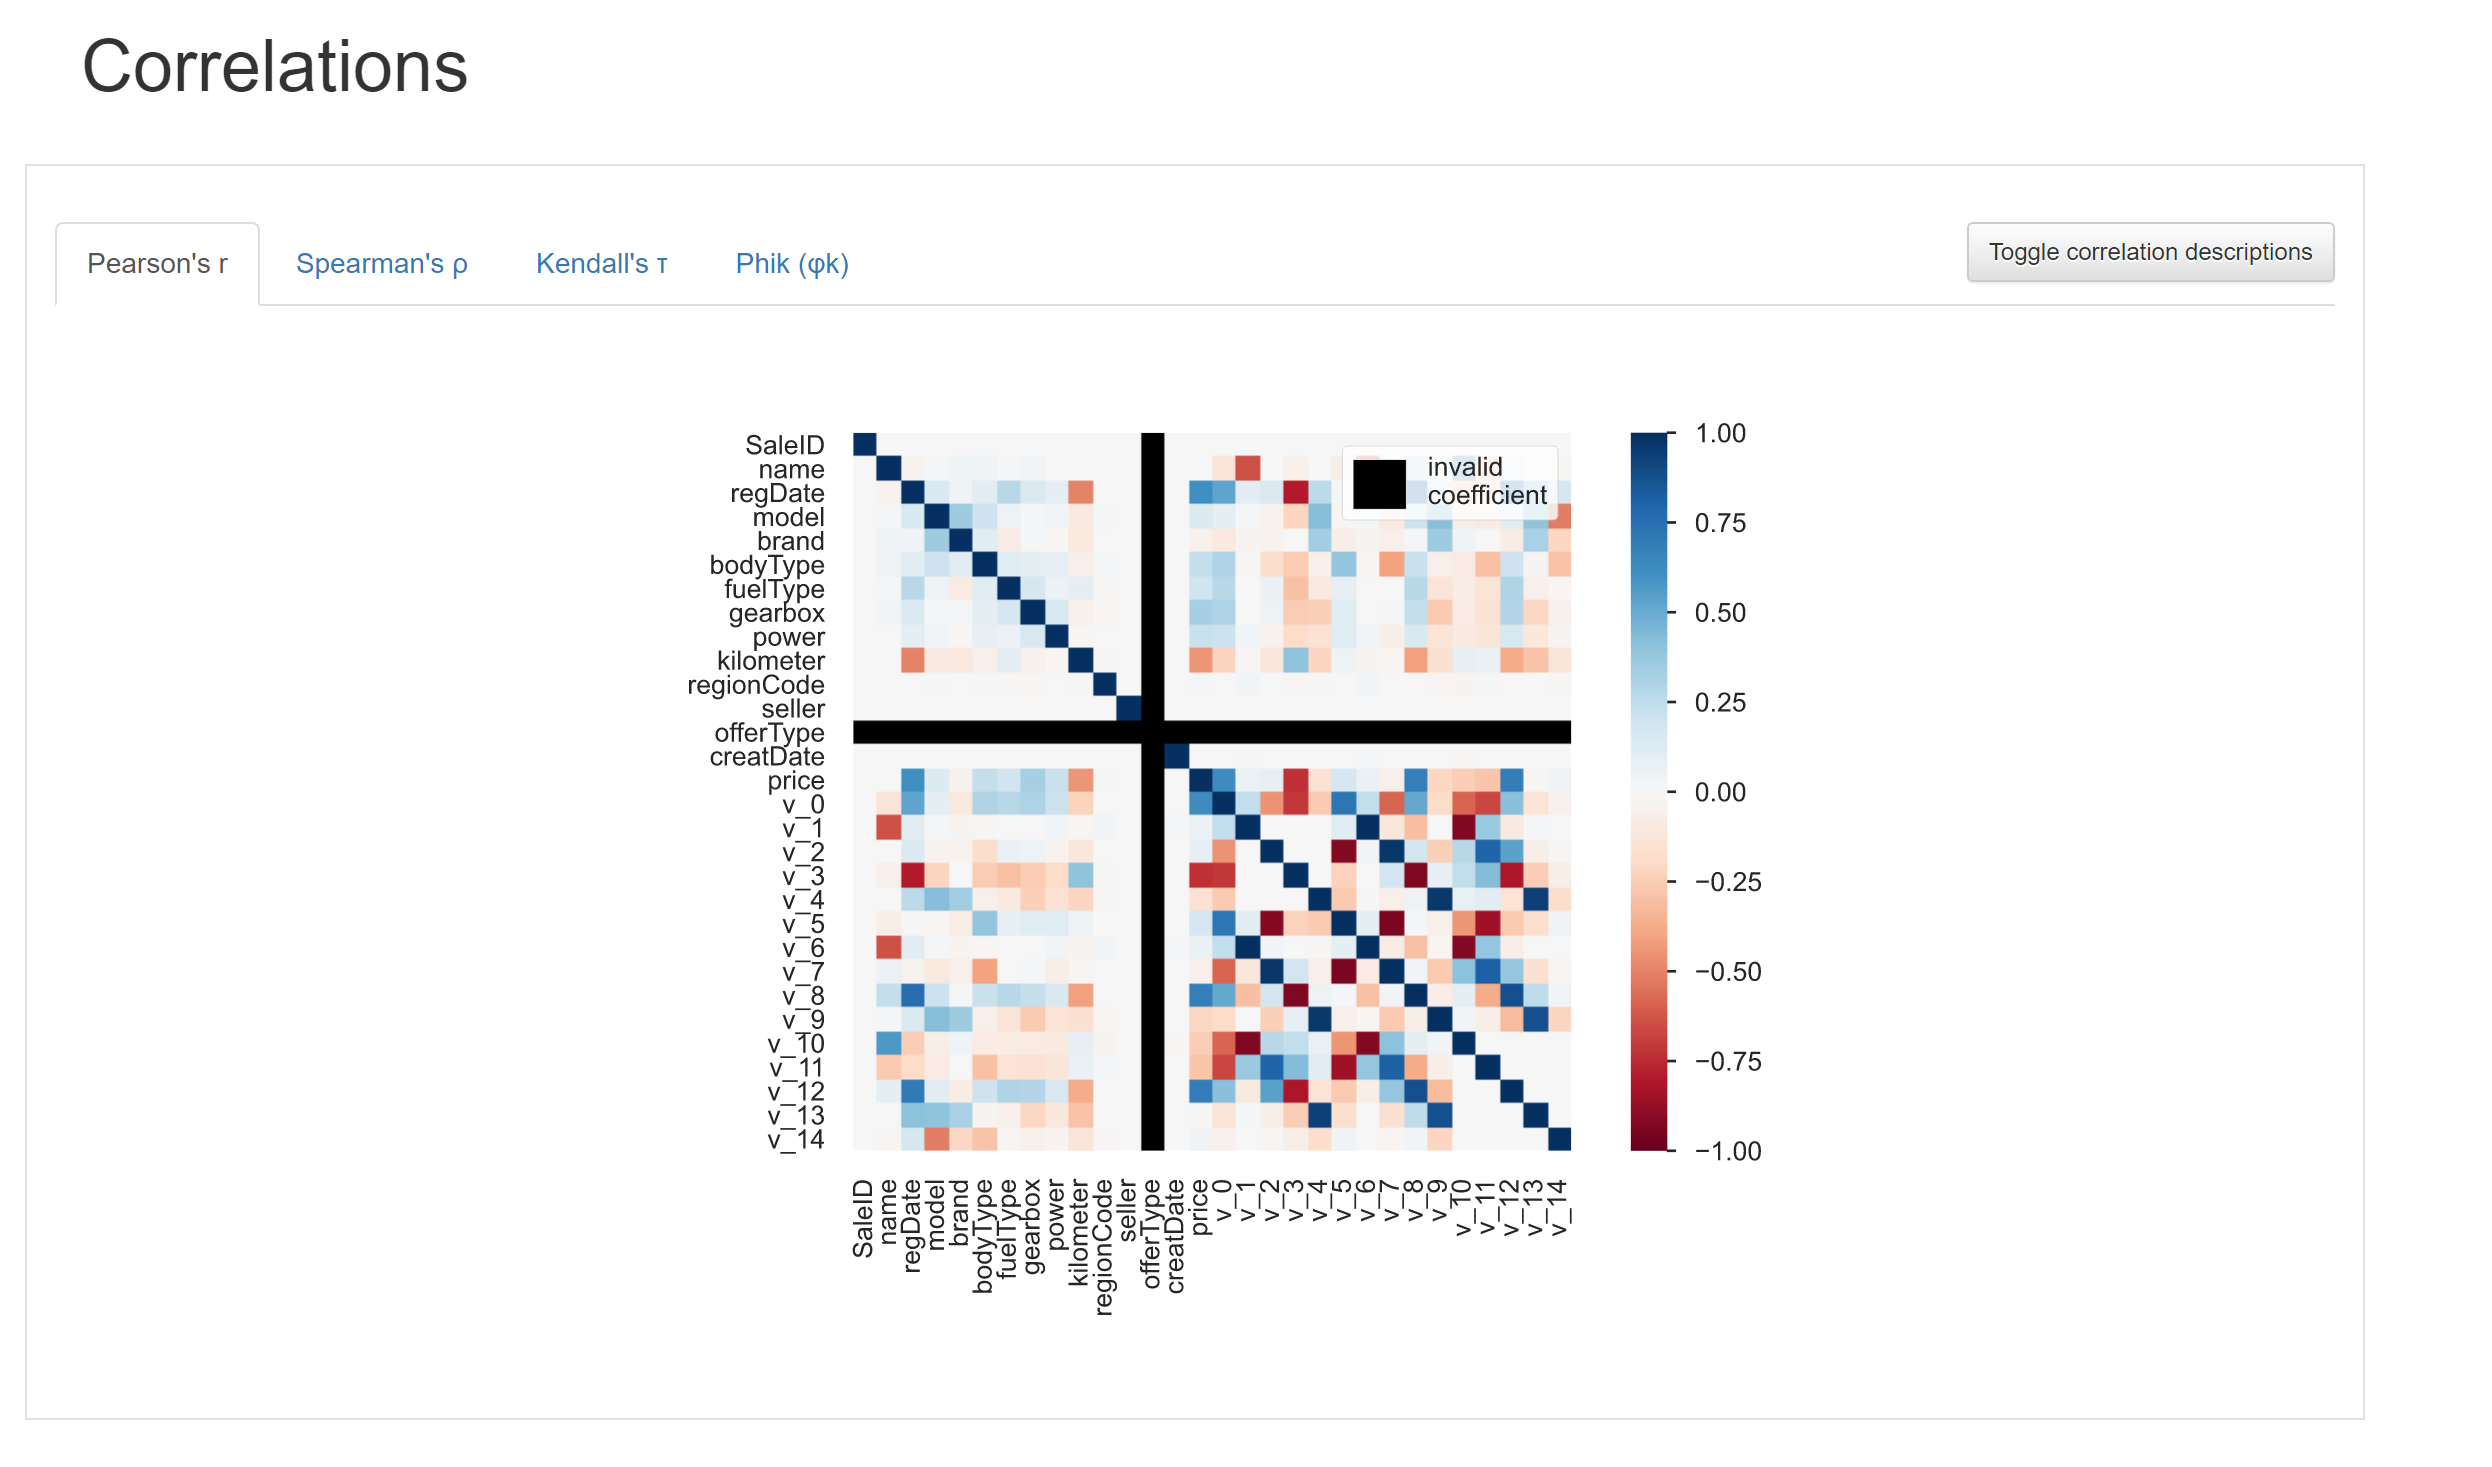

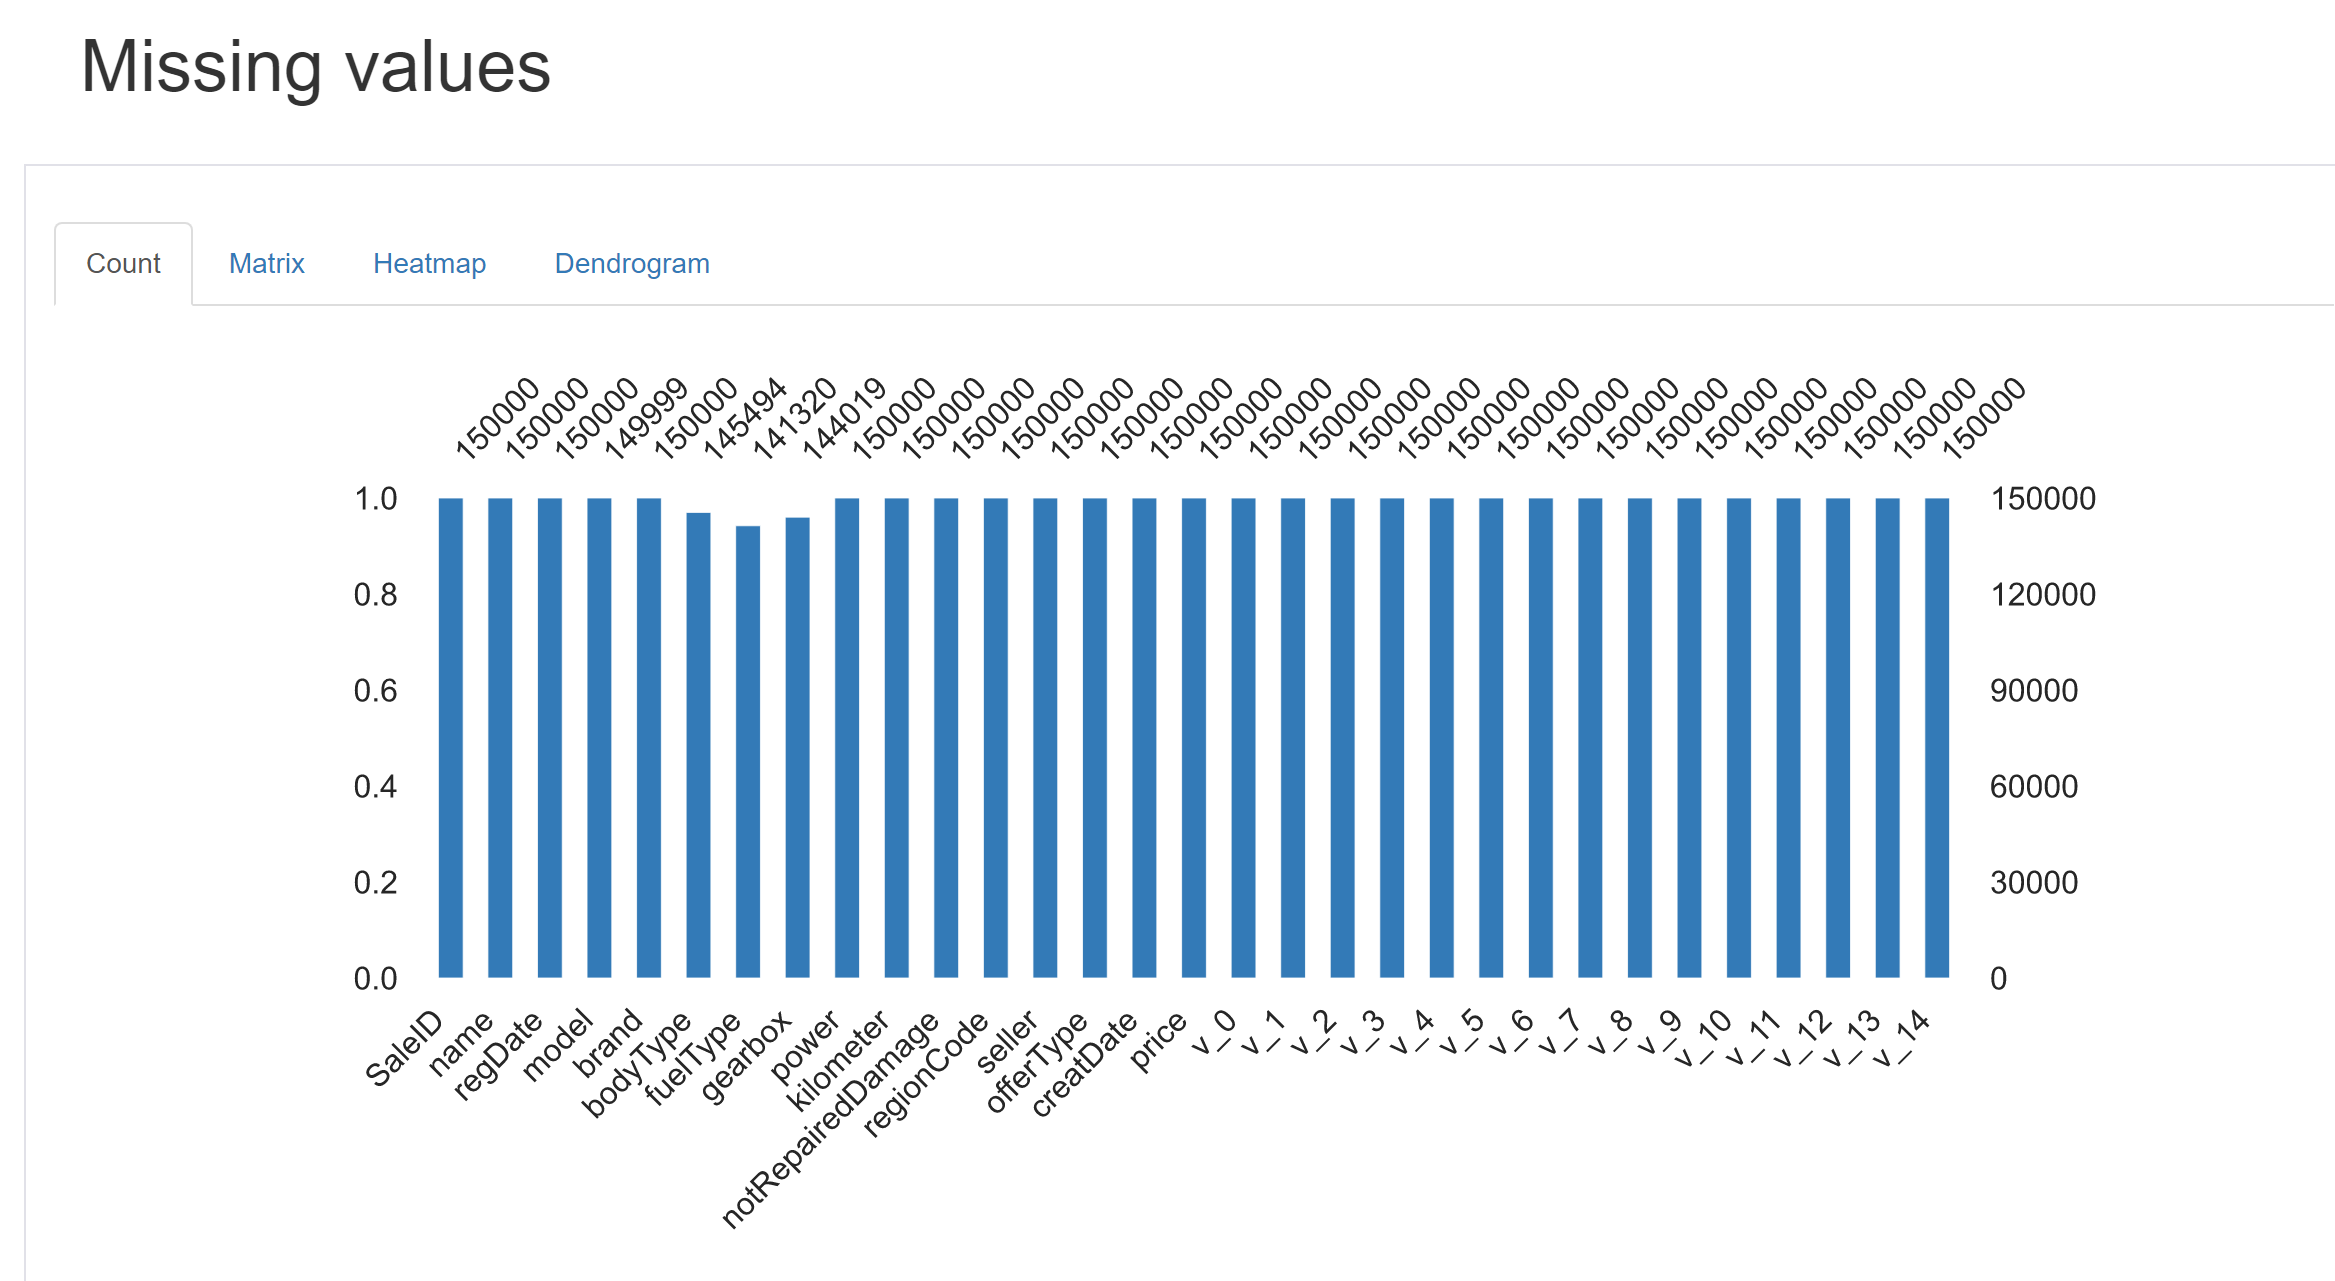